In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Addepalli Srinivas\AppData\Local\Temp\ipykernel_62668\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div class="alert alert-block alert-info">
    
### Based on best practices setting the assert required for any future run of this model
</div>

In [2]:
#Compatibility check. This version was developed under python release 3.12
import sys
from packaging import version
import sklearn
print ('Python version : ' , sys.version_info)
assert sys.version_info >= (3,12)
print ('sklear version : ' , sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.4.1")

Python version :  sys.version_info(major=3, minor=12, micro=1, releaselevel='final', serial=0)
sklear version :  1.4.1.post1


In [3]:
#Set Path for saving figures 
from pathlib import Path
IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<div class="alert alert-block alert-info">
    
### Task 1.	Perform data quality check by checking for missing values if any.
</div>

<div class="alert alert-block alert-success">
    
#### The following tasks and checks have been performed as part of quality checks
1. Read the data into dataframe
2. Head and tail the data
3. Null value checks
4. Datatype understanding of each fields
</div>

In [4]:
df_emp_eda = pd.read_csv('1688640705_hr_comma_sep.csv')

<div class="alert alert-block alert-success">
    
###### Read the file and created a dataset for Exploratory Data Analysis Purpose 
</div>

In [5]:
df_emp_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df_emp_eda.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df_emp_eda.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
df_emp_eda.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

<div class="alert alert-block alert-success">

##### Observations
###### 1. There are no Nan or null entires obsereved in the employee dataset
###### 2. Sales and salary field are category variables and of data type object
###### 3. Based on the assignemnt column : "left" is the target variable and others are predictor variables
</div>

<div class ="alert alert-block alert-info">

##### Task 2.	Understand what factors contributed most to employee turnover by EDA.
######   2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.
######   2.2.	Draw the distribution plot of 
######          Employee Satisfaction (use column satisfaction_level)
######          Employee Evaluation (use column last_evaluation)
######          Employee Average Monthly Hours (use column average_montly_hours)
######   2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot

</div>

<div class ="alert alert-block alert-info">

##### Approach / Steps Taken for EDA
###### 1. Describe the data study data mean, median, max, min and standard deviation
######   2.2.	Draw the distribution plot of 
######          Employee Satisfaction (use column satisfaction_level)
######          Employee Evaluation (use column last_evaluation)
######          Employee Average Monthly Hours (use column average_montly_hours)
######   2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot

</div>

In [9]:
#describe the data 
df_emp_eda.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


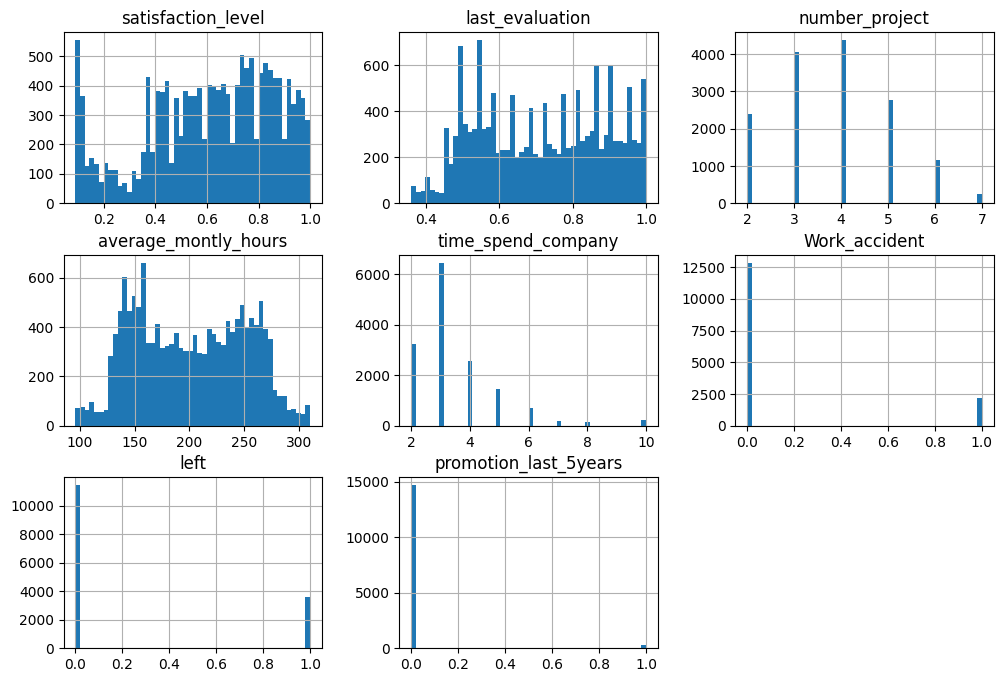

In [10]:
# Draw Histogram for each column in in dataset to get insights
df_emp_eda.hist(bins=50, figsize=(12,8))
plt.show()

<Axes: >

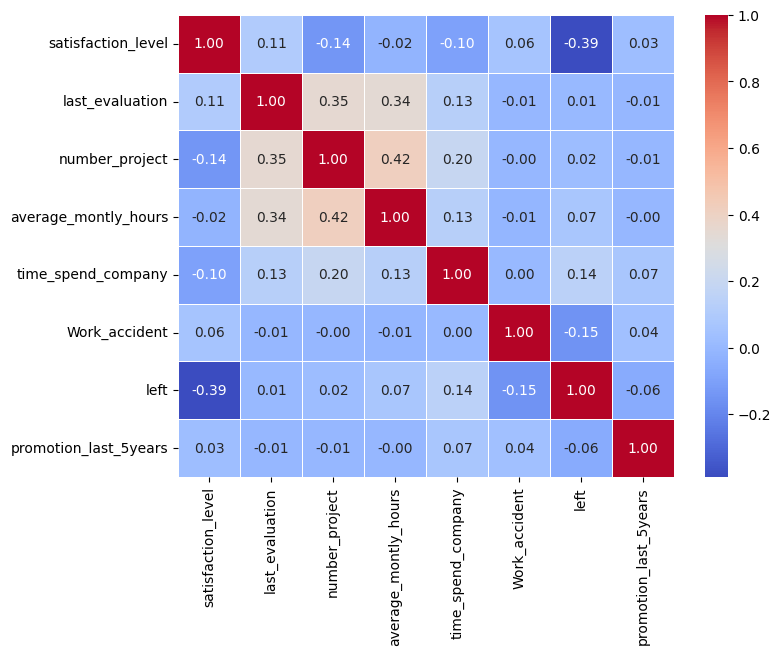

In [11]:
# Heatmap of Corelation matrix
corr = df_emp_eda.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [12]:
corr["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

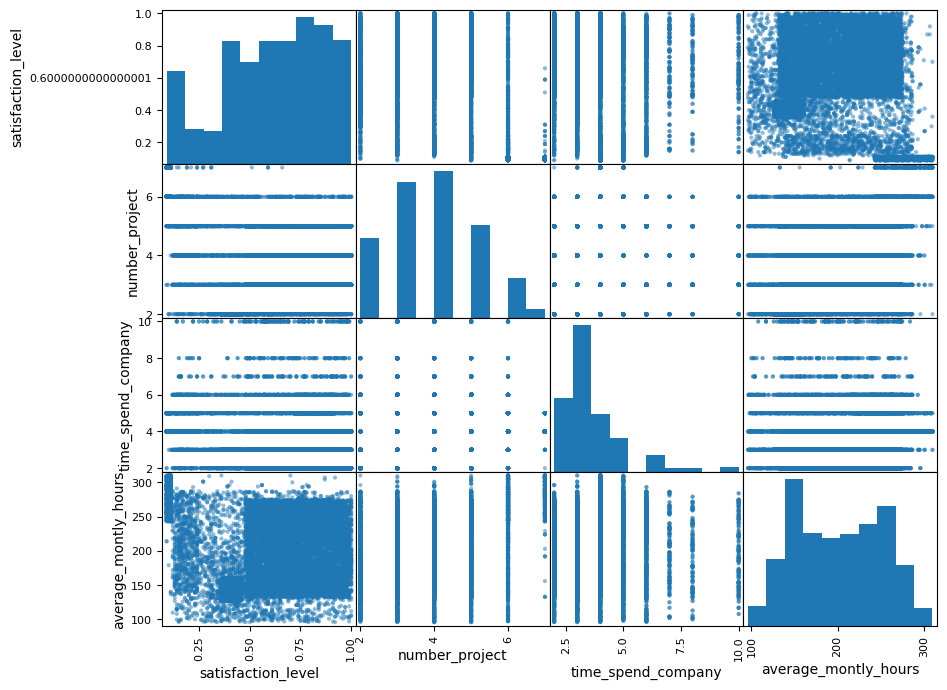

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["satisfaction_level","number_project", "time_spend_company", "average_montly_hours"]
scatter_matrix(df_emp_eda[attributes], figsize=(10, 8))
plt.show()

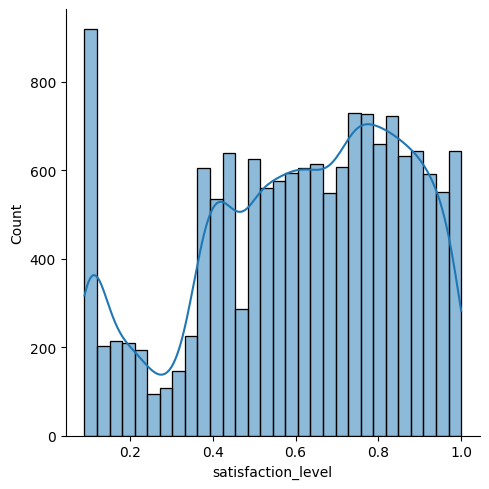

In [14]:
sns.displot(data=df_emp_eda, x="satisfaction_level",kind="hist", kde=True)

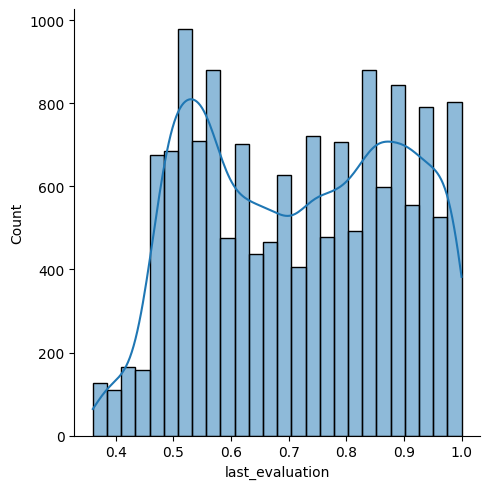

In [15]:
sns.displot(data=df_emp_eda, x="last_evaluation",kind="hist", kde=True)

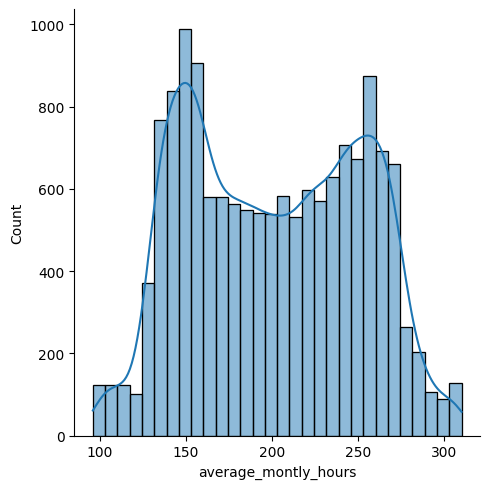

In [16]:
sns.displot(data=df_emp_eda.average_montly_hours,kind="hist", kde=True)

<Axes: xlabel='number_project', ylabel='count'>

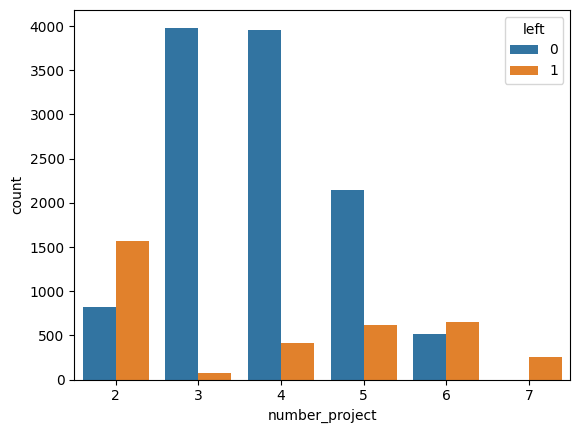

In [17]:
#df_emp_eda.groupby(['number_project'])['left'].value_counts().plot.barh(stacked=True)
df_emp_grpbynpleft = pd.DataFrame(df_emp_eda.groupby(['number_project'])['left'].value_counts())
sns.barplot(df_emp_grpbynpleft, x="number_project", y="count", hue="left")

### Task 3.	Perform clustering of Employees who left based on their satisfaction and evaluation.    
3.1.	Choose columns satisfaction_level, last_evaluation and left.    
3.2.	Do KMeans clustering of employees who left the company into 3 clusters    .
3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
ers.
s.


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [19]:
df_emp = pd.read_csv('1688640705_hr_comma_sep.csv')

In [20]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
df_emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df_emp_left = df_emp[df_emp["left"] == 1].reset_index()

In [23]:
df_emp_left

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
3566,14994,0.40,0.57,2,151,3,0,1,0,support,low
3567,14995,0.37,0.48,2,160,3,0,1,0,support,low
3568,14996,0.37,0.53,2,143,3,0,1,0,support,low
3569,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [24]:
X_cluster = np.array(df_emp_left[["satisfaction_level","last_evaluation"]])

In [25]:
X_cluster

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [26]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X_cluster)

In [27]:
model.cluster_centers_

array([[0.41014545, 0.51698182],
       [0.80851586, 0.91170931],
       [0.11115466, 0.86930085]])

In [28]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 0])

In [29]:
print(y_kmeans == 0, 0)

[ True False False ...  True False  True] 0


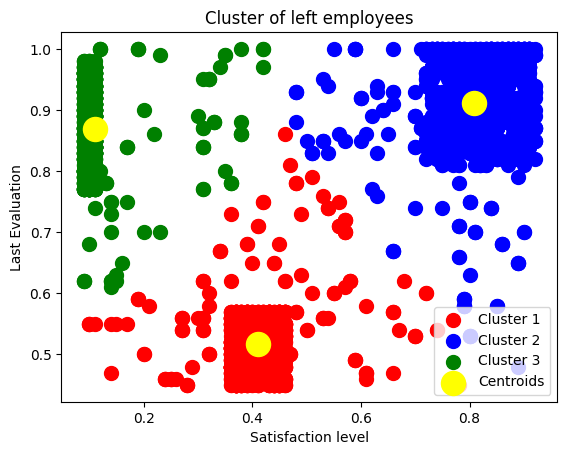

In [30]:
plt.scatter(X_cluster[y_kmeans == 0, 0], X_cluster[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_cluster[y_kmeans == 1, 0], X_cluster[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_cluster[y_kmeans == 2, 0], X_cluster[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of left employees')
plt.xlabel('Satisfaction level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

### 4.	Handle the left Class Imbalance using SMOTE technique.
4.1.	Pre-Process the data by converting categorical columns to numerical columns by
■	Separating categorical variables and numeric variables.
■	Applying get_dummies() to the categorical variables.
■	Combining categorical variables and numeric variables.
4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.


In [31]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [32]:
df_emp_dummies = pd.get_dummies(df_emp[["sales","salary"]], drop_first=True)
y = df_emp["left"]
x_ = df_emp.drop(['left','sales','salary'], axis =1).astype('float64')
X = pd.concat([x_,df_emp_dummies[[ 'sales_RandD','sales_accounting','sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng', 'sales_sales','sales_support','sales_technical','salary_low', 'salary_medium' ]]], axis =1)

In [33]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   sales_RandD            14999 non-null  bool   
 8   sales_accounting       14999 non-null  bool   
 9   sales_hr               14999 non-null  bool   
 10  sales_management       14999 non-null  bool   
 11  sales_marketing        14999 non-null  bool   
 12  sales_product_mng      14999 non-null  bool   
 13  sales_sales            14999 non-null  bool   
 14  sales_support          14999 non-null  bool   
 15  sa

In [35]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [36]:
feature_df= X.copy()
labels_df = y.copy()
feature_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False


In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [38]:
transformed_label_df

0        1
1        1
2        1
3        1
4        1
        ..
22851    1
22852    1
22853    1
22854    1
22855    1
Name: left, Length: 22856, dtype: int64

In [39]:
#data_for_strata = pd.concat([transformed_feature_df,transformed_label_df[['left']]])

In [40]:
transformed_label_df

0        1
1        1
2        1
3        1
4        1
        ..
22851    1
22852    1
22853    1
22854    1
22855    1
Name: left, Length: 22856, dtype: int64

In [41]:
#Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.2,  random_state=123)

In [42]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((18284, 18), (4572, 18), (18284,), (4572,))

### ML Alogorithms
#### 5.	Perform 5-Fold cross-validation model training and evaluate performance. 
#### 5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
#### 5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
#### 5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.



### Linear Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model_lr = lr.fit(X_train, y_train)



In [44]:
model_lr.intercept_ 

array([-2.91716116])

In [45]:
accuracy = model_lr.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7801837270341208


In [46]:
y_pred_lr = model_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[1748  561]
 [ 444 1819]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2309
           1       0.76      0.80      0.78      2263

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



In [47]:
print (cross_val_score(model_lr, X_train, y_train, cv=5, scoring="accuracy"))

[0.79600766 0.79382007 0.79108559 0.7973749  0.78829322]


### RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_randf = RandomForestClassifier(n_estimators=100, random_state=0)
model_randf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
print (cross_val_score(model_randf, X_train, y_train, cv=5, scoring="accuracy"))

[0.99015587 0.98933552 0.98878862 0.99371069 0.98987965]


In [50]:
from sklearn import metrics
y_pred_randf = model_randf.predict(X_test)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred_randf))
print('Test Precision:', metrics.precision_score(y_test, y_pred_randf))
print('Test Recall:', metrics.recall_score(y_test, y_pred_randf))

Test Accuracy: 0.9925634295713036
Test Precision: 0.9973226238286479
Test Recall: 0.9876270437472382


In [51]:
print(confusion_matrix(y_test,y_pred_randf))

[[2303    6]
 [  28 2235]]


In [52]:
print(classification_report(y_test,y_pred_randf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2309
           1       1.00      0.99      0.99      2263

    accuracy                           0.99      4572
   macro avg       0.99      0.99      0.99      4572
weighted avg       0.99      0.99      0.99      4572



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [54]:
print (cross_val_score(model_gbc, X_train, y_train, cv=5, scoring="accuracy"))

[0.96773311 0.96335794 0.9704676  0.97019415 0.96799781]


In [55]:
y_pred_gbc = model_gbc.predict(X_test)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred_gbc))
print('Test Precision:', metrics.precision_score(y_test, y_pred_gbc))
print('Test Recall:', metrics.recall_score(y_test, y_pred_gbc))

Test Accuracy: 0.9693788276465442
Test Precision: 0.9728285077951002
Test Recall: 0.965090587715422


In [56]:
print(confusion_matrix(y_test,y_pred_gbc))

[[2248   61]
 [  79 2184]]


In [57]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2309
           1       0.97      0.97      0.97      2263

    accuracy                           0.97      4572
   macro avg       0.97      0.97      0.97      4572
weighted avg       0.97      0.97      0.97      4572



### 6.	Identify the best model and justify the evaluation metrics used. 
#### 6.1.	Find the ROC/AUC for each model and plot the ROC curve.
#### 6.2.	Find the confusion matrix for each of the models.
#### 6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?


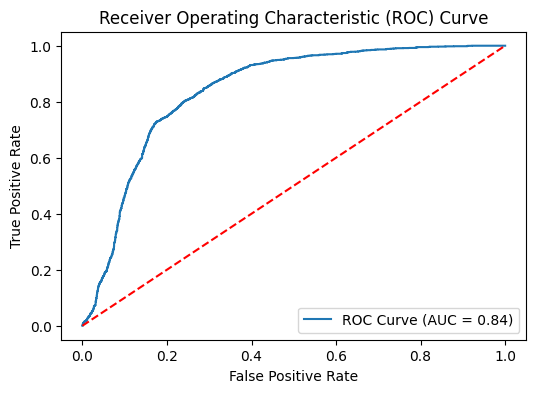

In [58]:
# ROC Curve  Logistic REgression
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
proba_lr = model_lr.predict_proba(X_test)
proba_class1_lr = proba_lr[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1_lr)
roc_auc = roc_auc_score(y_test, proba_class1_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

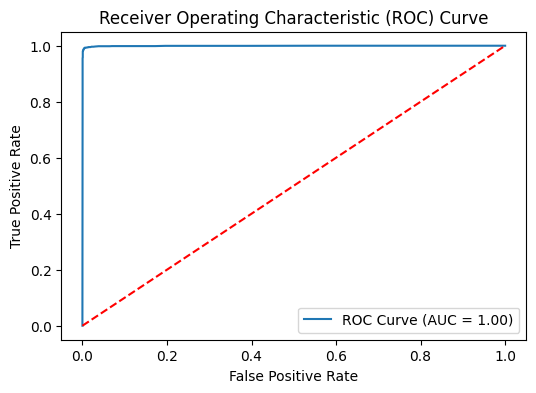

In [59]:
# ROC Curve  Randomforest
# ROC Curve

proba_randf = model_randf.predict_proba(X_test)
proba_class1_randf = proba_randf[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1_randf)
roc_auc = roc_auc_score(y_test, proba_class1_randf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

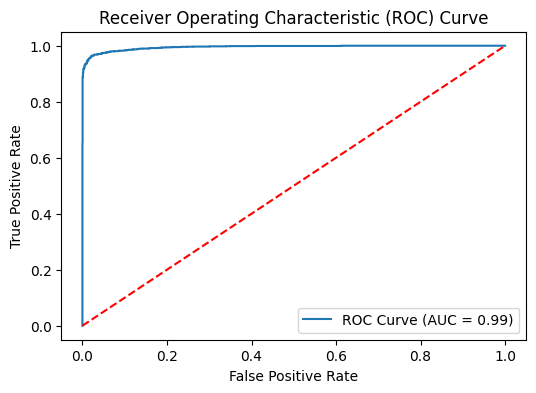

In [60]:
# ROC Curve  Gradient Boosting Classifier
# ROC Curve

proba_gbc = model_gbc.predict_proba(X_test)
proba_class1_gbc = proba_gbc[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1_gbc)
roc_auc = roc_auc_score(y_test, proba_class1_gbc)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Bagging & Boosting

## Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold

In [74]:
df_emp_bagging=pd.read_csv('1688640705_hr_comma_sep.csv')


In [75]:
df_emp_bagging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [86]:
y=np.array(df_emp_bagging['left'])
X=df_emp_bagging.drop(["left"],axis =1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [72]:
# Create a Logistic Regression Classifier

# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=5)

# Create a logistic regression classifier named cart
cart = LogisticRegression()

# The estimator will be set to 100, which is equal to the number of trees
num_trees = 10

In [73]:
bagging_model = BaggingClassifier(estimator=cart,n_estimators=num_trees, random_state=12, oob_score=True)

# Perform cross-validation using the model, feature matrix (X), target vector (Y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train, y_train, cv=kfold)

# Print the cross-validation results
print(results)

C:\Users\Addepalli Srinivas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Addepalli Srinivas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

KeyboardInterrupt: 